In [1]:
import autoEDA
import os
import pathlib
import pandas as pd

In [2]:
### Read titanic example data
data_dir = os.path.join(pathlib.Path(os.getcwd()).parent, 'example_data')
df = pd.read_csv(os.path.join(data_dir, 'titanic.csv'), dtype={'Pclass': 'object'})
df = df.drop(columns=['PassengerId', 'Name', 'Cabin'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


In [3]:
### Instantiate autoEDA with dataframe and target
target = 'Survived'
eda = autoEDA.ClassificationEDA(df, target)

<Figure size 720x64800 with 0 Axes>

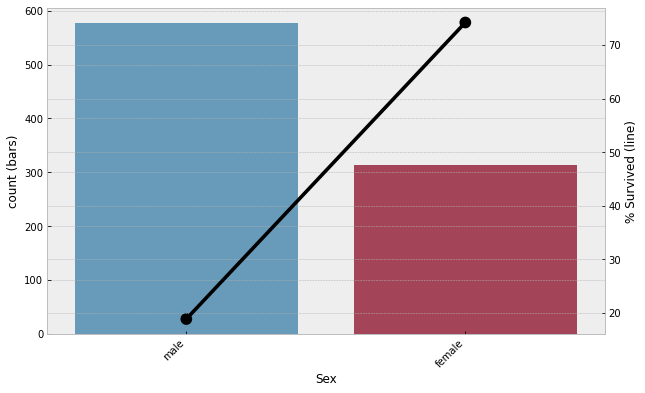

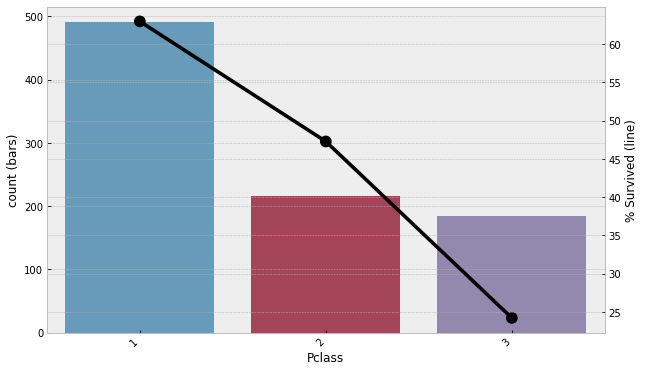

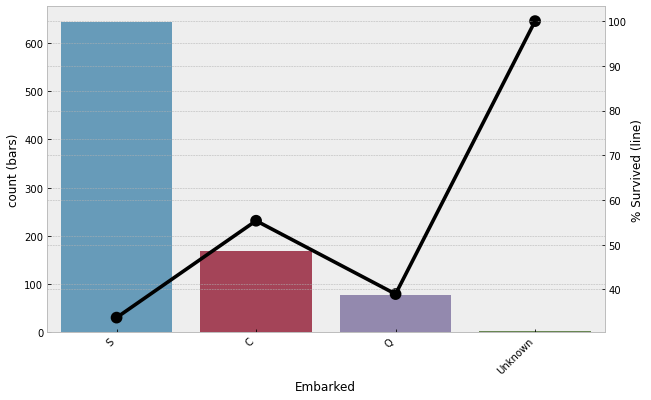

In [4]:
### Plot all categorical colunms with optional list of columns to exclude
eda.plot_categorical(exclude=['Ticket'])

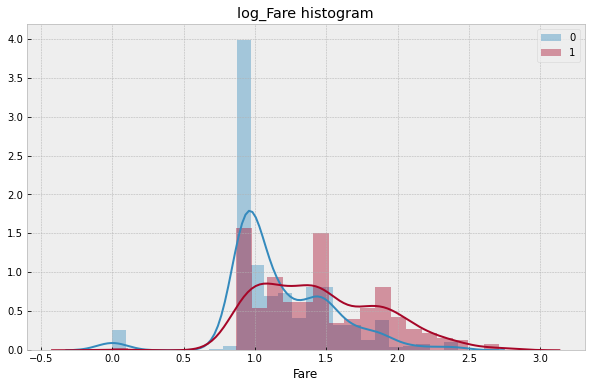

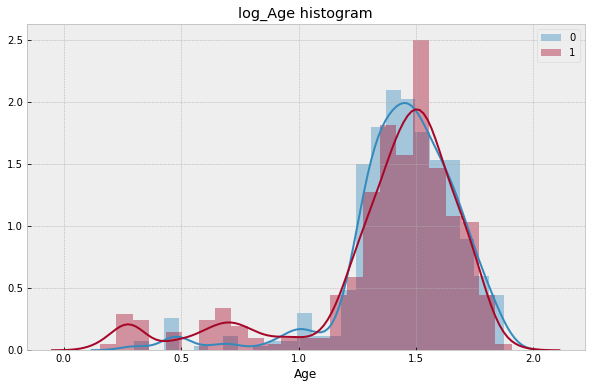

In [5]:
### Plot all numeric colunms
# Manually choosing Fare and Age to plot and to log transform all numeric columns
eda.plot_numeric(cols=['Fare', 'Age'], log_transform=True)

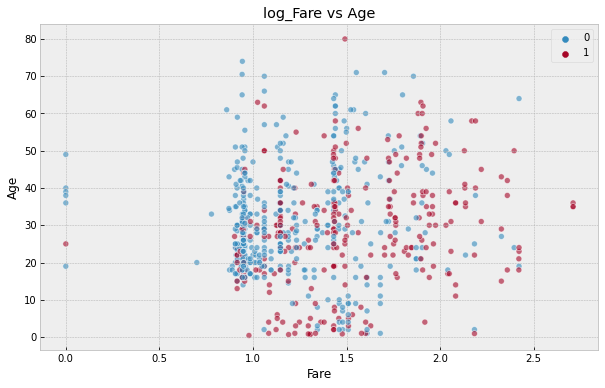

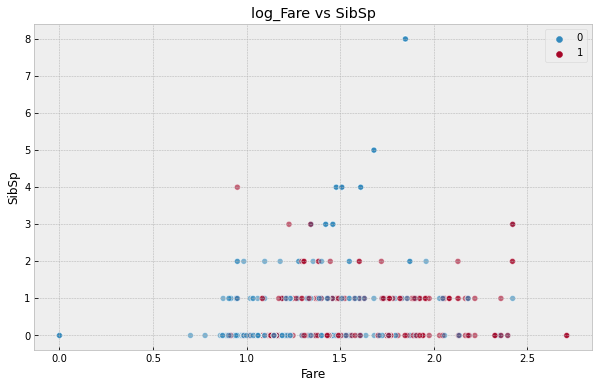

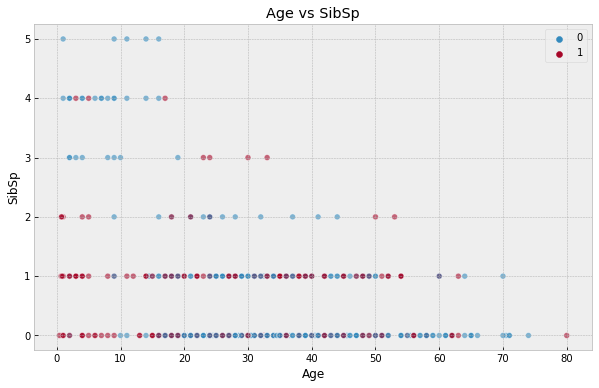

In [6]:
### Plot scatterplots of the pairs of numeric columns
# Manually inputting columns to plot and log transforming only the 'Fare' column
eda.plot_scatterplots(cols=['Fare', 'Age', 'SibSp'], log_transform=['Fare'])

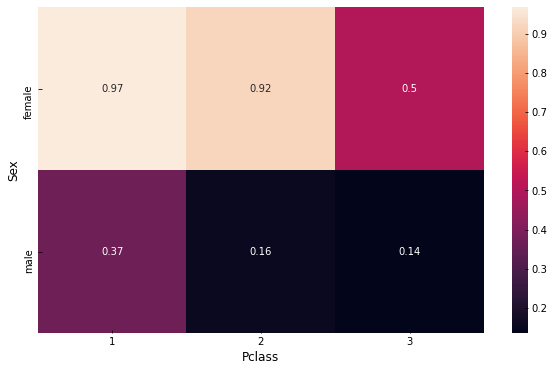

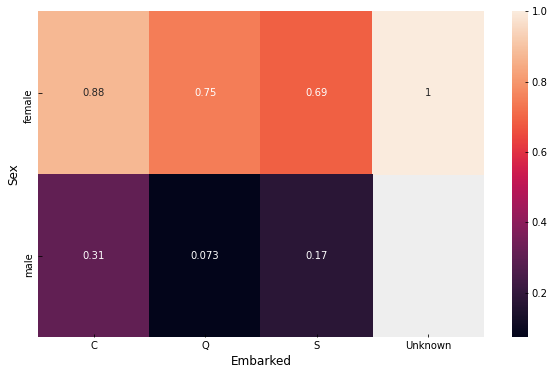

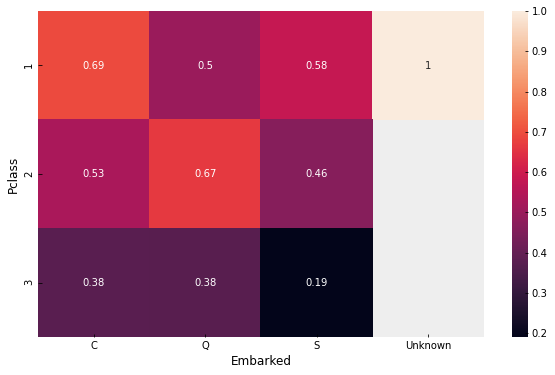

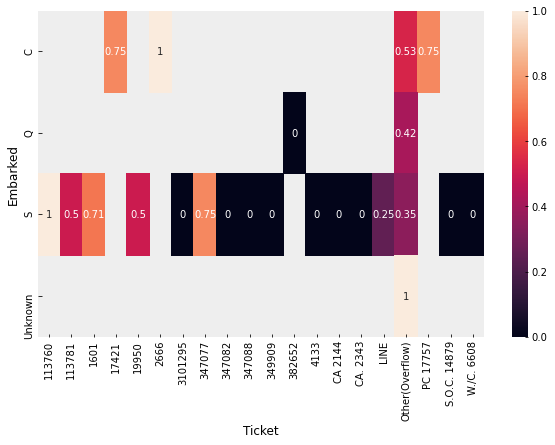

In [7]:
### Plot heatmaps of pairs of categorical columns vs target
# optional max_plots argument drops pairs with least correlation/predicitve power to the target
eda.plot_categorical_heatmaps(max_plots=4, annot=True)

['Sex', 'Fare', 'Age', 'Parch', 'Pclass', 'SibSp', 'Embarked']


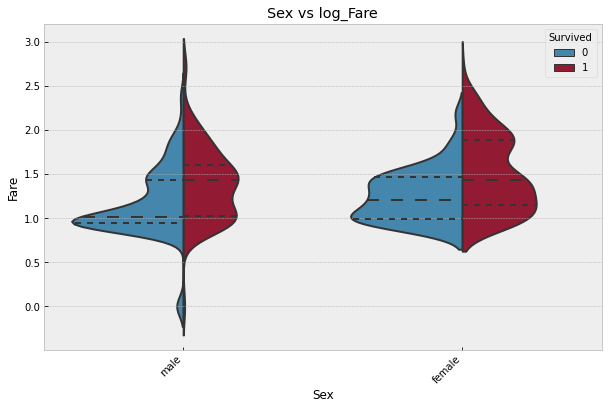

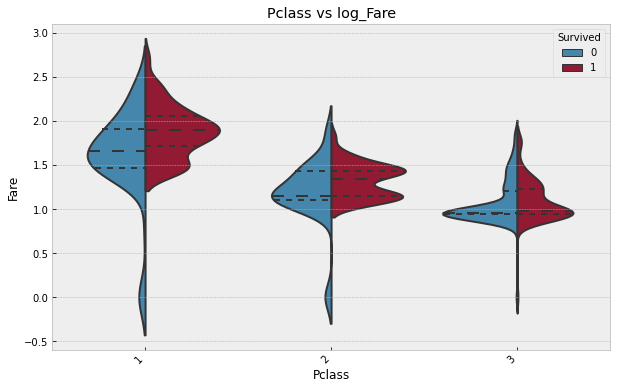

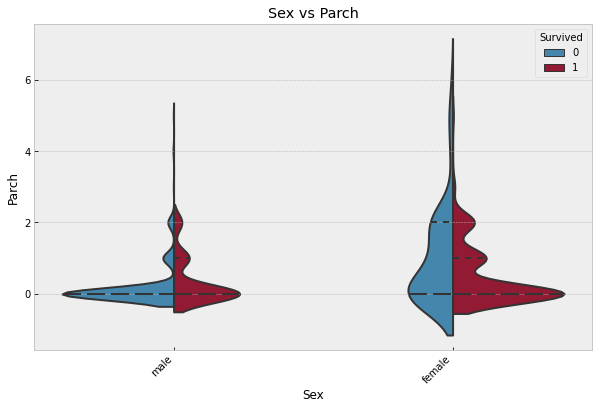

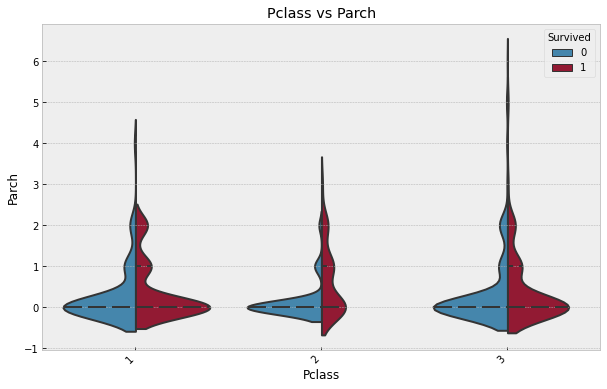

In [8]:
### Plot violin or boxplots for top 4 pairs of numeric and categoricals columns vs target
eda.plot_numeric_categorical_pairs(exclude=['Ticket'], log_transform=['Fare'], max_plots=4)

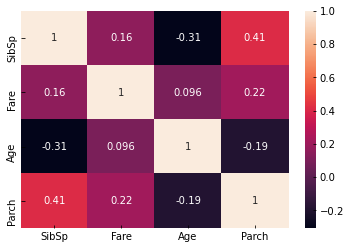

In [9]:
### Plot heatmap of the correlations of the numeric columns
eda.plot_corr_heatmap(annot=True)

Cumulative Explained variance at 2 PCA components: 0.9993551221630401


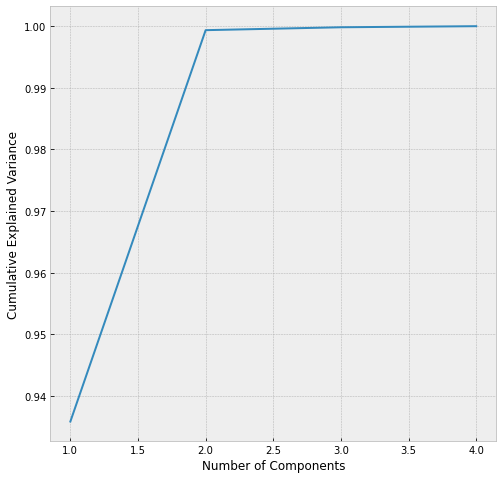

In [10]:
### Perform PCA and plot the cummulative variability explained by the principal components
eda.plot_pca()